# Conversion de grille du fichier de référence aux fichiers historiques

## Libraries

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import xesmf as xe
import matplotlib.pyplot as plt0
import glob

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


## Reference grid

In [2]:
path = "/home/jovyan/private-storage/grid/"
file = "nhsce_mon.v01r01_19661004_20250303_1.0x1.0.nc"
ref_grid = xr.open_dataset(os.path.join(path, file))

In [3]:
ref_grid = ref_grid.sel(time=slice("1995", "2014"))

## Reprojection

In [5]:
path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_dir = "/home/jovyan/private-storage/interp_models_hist"
os.makedirs(output_dir, exist_ok=True)

models = [
    "BCC-CSM2-MR", "CanESM5", "CanESM5-CanOE", "CESM2", "CESM2-WACCM", "CIESM",
    "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "EC-Earth3", "EC-Earth3-Veg",
    "FGOALS-f3-L", "FGOALS-g3", "GFDL-CM4", "GISS-E2-1-G", "HadGEM3-GC31-LL",
    "IPSL-CM6A-LR", "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR",
    "MRI-ESM2-0", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"
]

ref_grid = ref_grid

# search the good file
for model in models:
    file_pattern = os.path.join(path, f"snc_LImon_{model}_historical_*.nc")
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"Aucun fichier trouvé pour le modèle {model}")
        continue
    
    file_path = files[0]
    print(f"Traitement du modèle {model} : {file_path}")

# do this for each model, 1 by 1 to avoid reaching the memory limit    
    with xr.open_dataset(file_path) as ds:
        regridder = xe.Regridder(ds, ref_grid, "bilinear", periodic=True)
        ds_regridded = regridder(ds)

        output_path = os.path.join(output_dir, f"{model}_hist_reprojete.nc")
        ds_regridded.to_netcdf(output_path)
        print(f"Fichier sauvegardé : {output_path}")

        del ds_regridded, regridder

Traitement du modèle BCC-CSM2-MR : historical-LImon-snc/snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc
Fichier sauvegardé : interp_models_hist/BCC-CSM2-MR_hist_reprojete.nc
Traitement du modèle CanESM5 : historical-LImon-snc/snc_LImon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc
Fichier sauvegardé : interp_models_hist/CanESM5_hist_reprojete.nc
Traitement du modèle CanESM5-CanOE : historical-LImon-snc/snc_LImon_CanESM5-CanOE_historical_r1i1p2f1_gn_185001-201412.nc
Fichier sauvegardé : interp_models_hist/CanESM5-CanOE_hist_reprojete.nc
Traitement du modèle CESM2 : historical-LImon-snc/snc_LImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc


/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


Fichier sauvegardé : interp_models_hist/CESM2_hist_reprojete.nc
Traitement du modèle CESM2-WACCM : historical-LImon-snc/snc_LImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc


/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


Fichier sauvegardé : interp_models_hist/CESM2-WACCM_hist_reprojete.nc
Traitement du modèle CIESM : historical-LImon-snc/snc_LImon_CIESM_historical_r1i1p1f1_gr_185001-201412.nc
Fichier sauvegardé : interp_models_hist/CIESM_hist_reprojete.nc
Traitement du modèle CNRM-CM6-1 : historical-LImon-snc/snc_LImon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc
Fichier sauvegardé : interp_models_hist/CNRM-CM6-1_hist_reprojete.nc
Traitement du modèle CNRM-CM6-1-HR : historical-LImon-snc/snc_LImon_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_185001-201412.nc
Fichier sauvegardé : interp_models_hist/CNRM-CM6-1-HR_hist_reprojete.nc
Traitement du modèle CNRM-ESM2-1 : historical-LImon-snc/snc_LImon_CNRM-ESM2-1_historical_r1i1p1f2_gr_185001-201412.nc
Fichier sauvegardé : interp_models_hist/CNRM-ESM2-1_hist_reprojete.nc
Traitement du modèle EC-Earth3 : historical-LImon-snc/snc_LImon_EC-Earth3_historical_r1i1p1f1_gr_185001-201412.nc
Fichier sauvegardé : interp_models_hist/EC-Earth3_hist_reprojete.nc
Traitement 

In [5]:
import xarray as xr
import os
import xesmf as xe
import numpy as np

# Définir les chemins
path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_dir = "/home/jovyan/private-storage/interp_models_hist"
path_mask = "/home/jovyan/private-storage/masques/masques/pseudo_sftlf/"
os.makedirs(output_dir, exist_ok=True)

# Définir les fichiers
file_data = os.path.join(path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
file_mask = os.path.join(path_mask, "sftlf_BCC-CSM2-MR.nc")

# Charger les datasets
ds = xr.open_dataset(file_data)
mask = xr.open_dataset(file_mask)

# Extraire juste la variable à interpoler
da_snc = ds["snc"]

# Extraire et aligner le masque
mask_land = mask["sftlf"]
mask_land_aligned = mask_land.reindex_like(da_snc, method="nearest")

# Appliquer le masque > 10% pour garder les zones terrestres et les côtes (ajusté pour inclure plus d'îles)
ds_filtered = da_snc.where(mask_land_aligned >= 1)  # Utilise 10% de surface terrestre pour inclure les côtes et îles

# Si nécessaire, appliquer un masque inversé pour suivre la convention ESMF (1 = non-masqué, 0 = masqué)
value_mask = mask_land_aligned >= 1  # 10% de surface terrestre
esmf_mask = np.invert(value_mask.astype(bool)).astype(np.int32)  # Inverser pour la convention ESMF

# Optionnel: Ajouter le masque à la grille ESMF si tu utilises une grille compatible ESMF (facultatif dans ton cas)
# egrid = ESMF.Grid(np.array(ds_out.shape), staggerloc=ESMF.StaggerLoc.CENTER)
# egrid.add_item(ESMF.GridItem.MASK, staggerloc=ESMF.StaggerLoc.CENTER, from_file=False)
# egrid.mask[0][:] = esmf_mask

# Créer une grille cible régulière à 1° si pas déjà défini
# (ou remplacer par un fichier si tu en as un)
ds_out = ref_grid  # ta grille cible

# Créer le regridder
regridder = xe.Regridder(ds_filtered, ds_out, "bilinear", periodic=False, reuse_weights=False)

# Appliquer l'interpolation
snc_regridded = regridder(ds_filtered)

# Reconstituer un dataset
ds_snc_regridded = snc_regridded.to_dataset(name="snc")

# Sauvegarder le résultat
output_file = os.path.join(output_dir, "snc_BCC-CSM2-MR_interp1deg.nc")
ds_snc_regridded.to_netcdf(output_file)

print("✅ Fichier interpolé sauvegardé :", output_file)


✅ Fichier interpolé sauvegardé : /home/jovyan/private-storage/interp_models_hist/snc_BCC-CSM2-MR_interp1deg.nc


In [5]:
path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_dir = "/home/jovyan/private-storage/interp_models_hist_bis"
os.makedirs(output_dir, exist_ok=True)

models = [
    "BCC-CSM2-MR", "CanESM5", "CanESM5-CanOE", "CESM2", "CESM2-WACCM", "CIESM",
    "CNRM-CM6-1", "CNRM-CM6-1-HR", "CNRM-ESM2-1", "EC-Earth3", "EC-Earth3-Veg",
    "FGOALS-f3-L", "FGOALS-g3", "GFDL-CM4", "GISS-E2-1-G", "HadGEM3-GC31-LL",
    "IPSL-CM6A-LR", "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-HR", "MPI-ESM1-2-LR",
    "MRI-ESM2-0", "NorESM2-LM", "NorESM2-MM", "UKESM1-0-LL"
]

ref_grid = ref_grid

# search the good file
for model in models:
    file_pattern = os.path.join(path, f"snc_LImon_{model}_historical_*.nc")
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"Aucun fichier trouvé pour le modèle {model}")
        continue
    
    file_path = files[0]
    print(f"Traitement du modèle {model} : {file_path}")

# do this for each model, 1 by 1 to avoid reaching the memory limit    
    with xr.open_dataset(file_path) as ds:
        regridder = xe.Regridder(ds, ref_grid, method="nearest_s2d", ignore_degenerate=True)
        ds_regridded = regridder(ds)

        output_path = os.path.join(output_dir, f"{model}_hist_reprojete.nc")
        ds_regridded.to_netcdf(output_path)
        print(f"Fichier sauvegardé : {output_path}")

        del ds_regridded, regridder

Traitement du modèle BCC-CSM2-MR : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc
Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/BCC-CSM2-MR_hist_reprojete.nc
Traitement du modèle CanESM5 : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc
Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/CanESM5_hist_reprojete.nc
Traitement du modèle CanESM5-CanOE : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CanESM5-CanOE_historical_r1i1p2f1_gn_185001-201412.nc
Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/CanESM5-CanOE_hist_reprojete.nc
Traitement du modèle CESM2 : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc


/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/CESM2_hist_reprojete.nc
Traitement du modèle CESM2-WACCM : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc


/srv/conda/envs/notebook/lib/python3.12/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'snc' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/CESM2-WACCM_hist_reprojete.nc
Traitement du modèle CIESM : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CIESM_historical_r1i1p1f1_gr_185001-201412.nc
Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/CIESM_hist_reprojete.nc
Traitement du modèle CNRM-CM6-1 : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CNRM-CM6-1_historical_r1i1p1f2_gr_185001-201412.nc
Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/CNRM-CM6-1_hist_reprojete.nc
Traitement du modèle CNRM-CM6-1-HR : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CNRM-CM6-1-HR_historical_r1i1p1f2_gr_185001-201412.nc
Fichier sauvegardé : /home/jovyan/private-storage/interp_models_hist_bis/CNRM-CM6-1-HR_hist_reprojete.nc
Traitement du modèle CNRM-ESM2-1 : /home/jovyan/private-storage/historical-LImon-snc/snc_LImon_CNRM-ESM2-1_historical_r1i1p1f2_gr_185001-201412.nc
Fichier sauvega

In [12]:
import os
import xarray as xr
import xesmf as xe
import numpy as np

# Définir les chemins
path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_dir = "/home/jovyan/private-storage/interp_models_hist"
path_mask = "/home/jovyan/private-storage/masques/masques/pseudo_sftlf/"
os.makedirs(output_dir, exist_ok=True)

# Fichiers
file_data = os.path.join(path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
file_mask = os.path.join(path_mask, "sftlf_BCC-CSM2-MR.nc")

# Charger les données
ds = xr.open_dataset(file_data)
mask = xr.open_dataset(file_mask)

# Charger la grille cible
ref_grid = ref_grid

# Extraire la variable de neige
da_snc = ds["snc"]

# Interpolation de la neige (pas de masque ici !)
regridder_snc = xe.Regridder(da_snc, ref_grid, "bilinear", periodic=True, reuse_weights=False)
snc_regridded = regridder_snc(da_snc)

# Interpolation du masque avec méthode nearest
mask_land = mask["sftlf"]
regridder_mask = xe.Regridder(mask_land, ref_grid, "nearest_s2d", periodic=True, reuse_weights=False)
mask_regridded = regridder_mask(mask_land)

# Application du masque (> 1% de surface terrestre)
snc_regridded_masked = snc_regridded.where(mask_regridded >= 1)

# Reconstituer un dataset
ds_snc_regridded = snc_regridded_masked.to_dataset(name="snc")

# Sauvegarder le fichier NetCDF
output_file = os.path.join(output_dir, "snc_BCC-CSM2-MR_interp_refgrid.nc")
ds_snc_regridded.to_netcdf(output_file)

print("✅ Fichier interpolé et masqué sauvegardé :", output_file)


✅ Fichier interpolé et masqué sauvegardé : /home/jovyan/private-storage/interp_models_hist/snc_BCC-CSM2-MR_interp_refgrid.nc


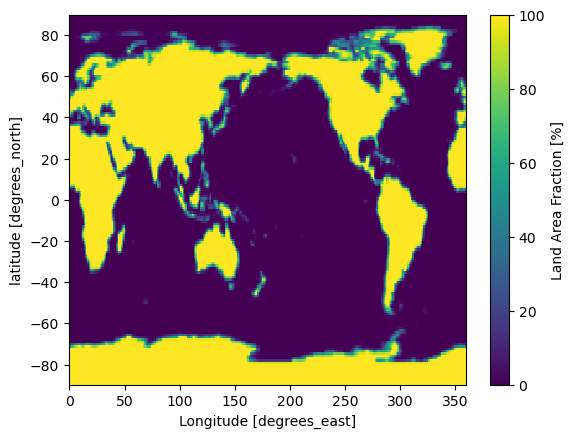

In [6]:
mask_land.plot()

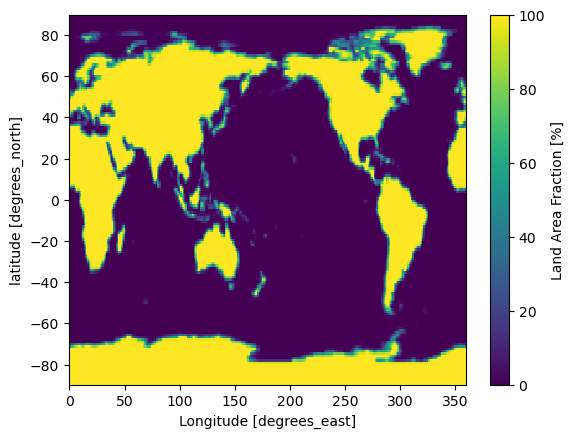

In [7]:
mask_land_aligned.plot()

In [4]:
import os
import xarray as xr
import xesmf as xe
import numpy as np

# Définir les chemins
path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_dir = "/home/jovyan/private-storage/interp_models_hist"
path_mask = "/home/jovyan/private-storage/interp_sftlf"
os.makedirs(output_dir, exist_ok=True)

# Fichiers
file_data = os.path.join(path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
file_mask = os.path.join(path_mask, "BCC-CSM2-MR_sftlf_reprojete.nc")

# Charger les données
ds = xr.open_dataset(file_data)
mask = xr.open_dataset(file_mask)

# Charger la grille cible
ref_grid = ref_grid

# Extraire la variable de neige
da_snc = ds["snc"]

# Interpolation de la neige (pas de masque ici !)
regridder_snc = xe.Regridder(da_snc, ref_grid, "bilinear", periodic=True, reuse_weights=False)
snc_regridded = regridder_snc(da_snc)

# Interpolation du masque avec méthode nearest
mask_land = mask["sftlf"]
#regridder_mask = xe.Regridder(mask_land, ref_grid, "conservative", periodic=True, reuse_weights=False)
#mask_regridded = regridder_mask(mask_land)

# Application du masque (> 1% de surface terrestre)
snc_regridded_masked = snc_regridded.where(mask_land > 0)

# Reconstituer un dataset
ds_snc_regridded = snc_regridded_masked.to_dataset(name="snc")

# Sauvegarder le fichier NetCDF
output_file = os.path.join(output_dir, "snc_BCC-CSM2-MR_interp_refgrid6.nc")
ds_snc_regridded.to_netcdf(output_file)

print("✅ Fichier interpolé et masqué sauvegardé :", output_file)


✅ Fichier interpolé et masqué sauvegardé : /home/jovyan/private-storage/interp_models_hist/snc_BCC-CSM2-MR_interp_refgrid6.nc


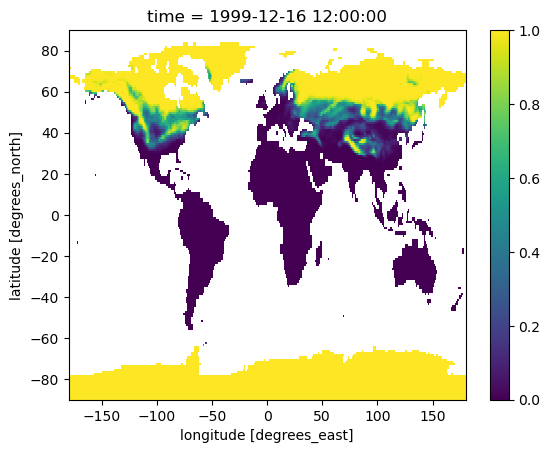

In [6]:
snc_1800 = snc_regridded.isel(time=1799)
snc_1800.plot()

In [14]:
import xarray as xr
import xesmf as xe

path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_dir = "/home/jovyan/private-storage/interp_models_hist"
path_mask = "/home/jovyan/private-storage/interp_sftlf"
os.makedirs(output_dir, exist_ok=True)

file_data = os.path.join(path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
file_mask = os.path.join(path_mask, "BCC-CSM2-MR_sftlf_reprojete.nc")

ds = xr.open_dataset(file_data)
mask = xr.open_dataset(file_mask)

ref_grid = ref_grid

da_snc = ds["snc"]

#extraire masque 
mask_land = mask["sftlf"]

# interpolation du masque
if not mask_land.sizes == da_snc.sizes:
    regridder_mask = xe.Regridder(mask_land, da_snc, "nearest_s2d", periodic=True, reuse_weights=False)
    mask_land_on_snc_grid = regridder_mask(mask_land)
else:
    mask_land_on_snc_grid = mask_land

# application du masque
da_snc_masked = da_snc.where(mask_land_on_snc_grid > 0)

# interpolation
regridder_snc = xe.Regridder(da_snc_masked, ref_grid, "nearest_s2d", periodic=True, reuse_weights=False)
snc_regridded = regridder_snc(da_snc_masked)

output_dataset = xr.Dataset({"snc": snc_regridded_masked})
output_dataset.to_netcdf("neige_regridded_masquee2.nc")

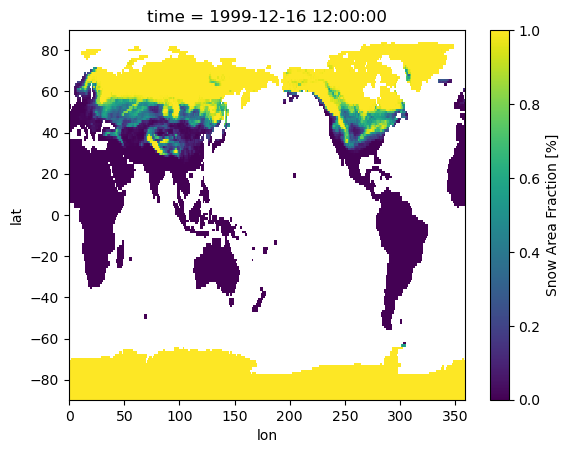

In [13]:
snow = da_snc_masked.isel(time=1799)
snow.plot()

In [15]:
BCC_CSM2_regrid = xr.open_dataset("neige_regridded_masquee2.nc")

In [16]:
BCC_CSM2_regrid

<xarray.Dataset> Size: 513MB
Dimensions:  (time: 1980, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    snc      (time, lat, lon) float32 513MB ...

In [17]:
snow_cover_regrid = BCC_CSM2_regrid["snc"]
snow_cover_regrid

<xarray.DataArray 'snc' (time: 1980, lat: 180, lon: 360)> Size: 513MB
[128304000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    regrid_method:  bilinear

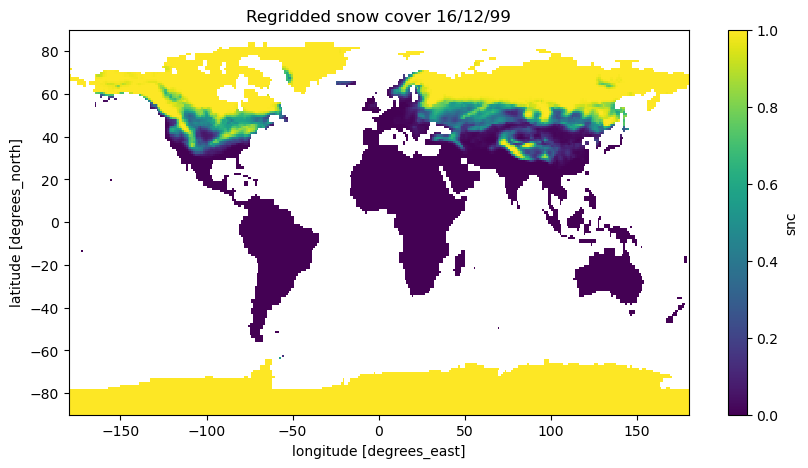

In [18]:
import matplotlib.pyplot as plt

snow_cover_1800 = snow_cover_regrid.isel(time=1799)

plt.figure(figsize=(10, 5))
snow_cover_1800.plot()
plt.title("Regridded snow cover 16/12/99")
plt.savefig('Regridded_snow_cover_16-12-99.png')

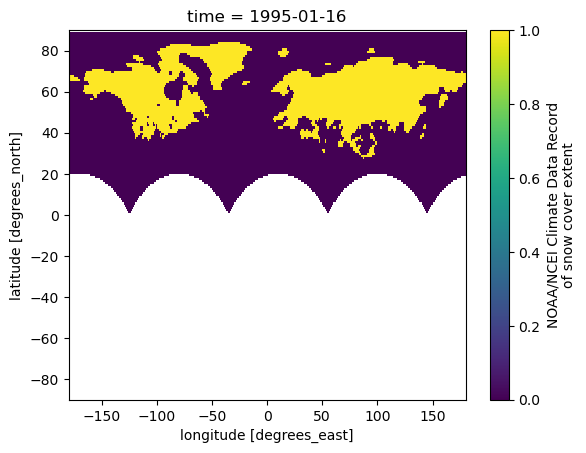

In [24]:
snow = ref_grid["snow_cover_extent"]

snow_1800 = snow.isel(time=0)

snow_1800.plot()

In [22]:
snow

<xarray.DataArray 'snow_cover_extent' (time: 240, lat: 180, lon: 360)> Size: 62MB
[15552000 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) datetime64[ns] 2kB 1995-01-16 1995-02-16 ... 2014-12-15
Attributes:
    standard_name:  surface_snow_binary_mask
    long_name:      NOAA/NCEI Climate Data Record of snow cover extent
    cell_methods:   time: mean
    flag_values:    [0 1]
    flag_meanings:  no_snow snow_covered

In [28]:
import xarray as xr
import xesmf as xe
import numpy as np
import os

# --- Chargement des données ---
path = "/home/jovyan/private-storage/historical-LImon-snc/"
file_data = os.path.join(path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
ds = xr.open_dataset(file_data)
da_snc = ds["snc"]

# Optionnel : prendre une sous-période pour tester plus vite
# da_snc = da_snc.sel(time=slice("2000-01-01", "2005-12-31"))

# --- Grille cible à 1° ---
ref_grid = ref_grid

# --- Total original ---
total_original = da_snc.sum(dim=["lat", "lon"], skipna=True)

# Méthode 1 : Bilinear
regridder_bilinear = xe.Regridder(da_snc, ref_grid, "bilinear", periodic=True)
snc_bilinear = regridder_bilinear(da_snc)
total_bilinear = snc_bilinear.sum(dim=["lat", "lon"], skipna=True)

# Méthode 2 : Bilinear + correction
correction_factor = total_original / total_bilinear
snc_bilinear_corrected = snc_bilinear * correction_factor
total_corrected = snc_bilinear_corrected.sum(dim=["lat", "lon"], skipna=True)

# Méthode 3 : Conservative
try:
    regridder_conserv = xe.Regridder(da_snc, ref_grid, "conservative", periodic=True)
    snc_conservative = regridder_conserv(da_snc)
    total_conservative = snc_conservative.sum(dim=["lat", "lon"], skipna=True)
except Exception as e:
    snc_conservative = None
    total_conservative = "Erreur : " + str(e)

# --- Résumé des résultats ---
print("\n=== COMPARAISON DES MÉTHODES D'INTERPOLATION ===")
print(f"Neige totale originale         : {float(total_original.sum().values):.2e}")
print(f"Bilinear (sans correction)     : {float(total_bilinear.sum().values):.2e}")
print(f"Bilinear + correction factor   : {float(total_corrected.sum().values):.2e}")

if isinstance(total_conservative, str):
    print(f"Conservative                   : {total_conservative}")
else:
    print(f"Conservative                   : {float(total_conservative.sum().values):.2e}")



=== COMPARAISON DES MÉTHODES D'INTERPOLATION ===
Neige totale originale         : 1.84e+07
Bilinear (sans correction)     : 2.18e+07
Bilinear + correction factor   : 1.84e+07
Conservative                   : 2.19e+07


In [35]:
pip install cdo

  Using cached cdo-1.6.1-py3-none-any.whl.metadata (14 kB)
Using cached cdo-1.6.1-py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import subprocess
import os
import cdo
import xarray as xr

# --- Chemins ---
input_path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_path = "/home/jovyan/private-storage/interp_models_hist/"
os.makedirs(output_path, exist_ok=True)

file_snc = os.path.join(input_path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
reference_grid_file = "/home/jovyan/private-storage/grid/nhsce_mon.v01r01_19661004_20250303_1.0x1.0.nc"  # Grille personnalisée
output_file_bilinear = os.path.join(output_path, "snc_bilinear_with_ref.nc")
output_file_conservative = os.path.join(output_path, "snc_conservative_with_ref.nc")

# --- Charger les données originales ---
ds = xr.open_dataset(file_snc)
da_snc = ds["snc"]

# --- Calcul du total original pour comparaison ---
total_before = da_snc.sum(dim=["lat", "lon"], skipna=True).values
#print(f"Total de neige avant interpolation : {total_before:.2e}")

# --- Commandes CDO pour l'interpolation avec grille personnalisée ---
# Commande pour interpolation bilinéaire (en utilisant une grille personnalisée)
command_bilinear = f"cdo remapbil,{reference_grid_file} {file_snc} {output_file_bilinear}"
# Commande pour interpolation conservatrice (en utilisant une grille personnalisée)
command_conservative = f"cdo remapcon,{reference_grid_file} {file_snc} {output_file_conservative}"

# --- Exécution des commandes CDO ---
subprocess.run(command_bilinear, shell=True)
subprocess.run(command_conservative, shell=True)

print(f"Interpolation bilinéaire enregistrée sous : {output_file_bilinear}")
print(f"Interpolation conservatrice enregistrée sous : {output_file_conservative}")

# --- Charger les fichiers interpolés avec CDO ---
ds_bilinear = xr.open_dataset(output_file_bilinear)
ds_conservative = xr.open_dataset(output_file_conservative)

# --- Enregistrer les fichiers interpolés comme NetCDF ---
# Sauvegarder les fichiers interpolés en NetCDF après interpolation
ds_bilinear.to_netcdf(output_file_bilinear)
ds_conservative.to_netcdf(output_file_conservative)

print(f"Fichiers sauvegardés sous : {output_file_bilinear}")
print(f"Fichiers sauvegardés sous : {output_file_conservative}")

# --- Calcul du total après interpolation ---
total_bilinear = ds_bilinear["snc"].sum(dim=["lat", "lon"], skipna=True).values
total_conservative = ds_conservative["snc"].sum(dim=["lat", "lon"], skipna=True).values

print(f"Total de neige après interpolation bilinéaire : {total_bilinear:.2e}")
print(f"Total de neige après interpolation conservatrice : {total_conservative:.2e}")

# --- Comparaison des résultats ---
print("\n=== COMPARAISON DES TOTALS ===")
print(f"Total original           : {total_before:.2e}")
print(f"Total après bilinéaire   : {total_bilinear:.2e} ({(total_bilinear/total_before - 1) * 100:.2f}% différence)")
print(f"Total après conservatif  : {total_conservative:.2e} ({(total_conservative/total_before - 1) * 100:.2f}% différence)")

cdo    remapbil: Bilinear weights from gaussian (320x160) to lonlat (360x180) grid, with source mask (19598)
cdo    remapbil: Processed 101376000 values from 1 variable over 1980 timesteps [3.48s 59MB].
cdo    remapcon: YAC first order conservative weights from gaussian (320x160) to lonlat (360x180) grid, with source mask (19598)
cdo    remapcon: Processed 101376000 values from 1 variable over 1980 timesteps [3.85s 56MB].
Interpolation bilinéaire enregistrée sous : /home/jovyan/private-storage/interp_models_hist/snc_bilinear_with_ref.nc
Interpolation conservatrice enregistrée sous : /home/jovyan/private-storage/interp_models_hist/snc_conservative_with_ref.nc
Fichiers sauvegardés sous : /home/jovyan/private-storage/interp_models_hist/snc_bilinear_with_ref.nc
Fichiers sauvegardés sous : /home/jovyan/private-storage/interp_models_hist/snc_conservative_with_ref.nc


/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/srv/conda/envs/notebook/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [2]:
BCC_CSM2_regrid = xr.open_dataset("/home/jovyan/private-storage/interp_models_hist/snc_bilinear_with_ref.nc")

In [3]:
snow_cover_regrid = BCC_CSM2_regrid["snc"]
snow_cover_regrid

<xarray.DataArray 'snc' (time: 1980, lat: 180, lon: 360)> Size: 513MB
[128304000 values with dtype=float32]
Coordinates:
  * time     (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  surface_snow_area_fraction
    long_name:      Snow Area Fraction
    units:          %
    comment:        Fraction of each grid cell that is occupied by snow that ...
    original_name:  SNC
    cell_methods:   area: time: mean (interval: 20 minutes)
    cell_measures:  area: areacella
    history:        2018-11-14T10:00:09Z altered by CMOR: replaced missing va...

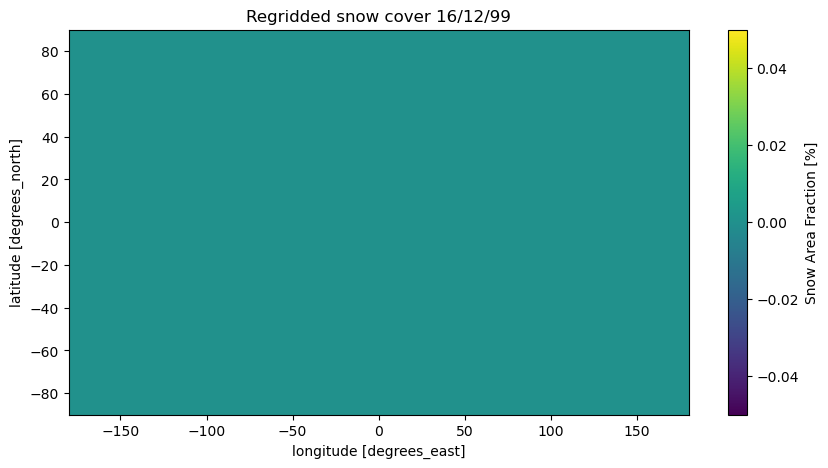

In [4]:
import matplotlib.pyplot as plt

snow_cover_1800 = snow_cover_regrid.isel(time=1799)

plt.figure(figsize=(10, 5))
snow_cover_1800.plot()
plt.title("Regridded snow cover 16/12/99")
plt.savefig('Regridded_snow_cover_16-12-99.png')

In [7]:
pip install esmpy

Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import xarray as xr
import esmpy
import numpy as np

# === Chemins ===
input_path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_path = "/home/jovyan/private-storage/interp_models_hist/"
os.makedirs(output_path, exist_ok=True)

file_snc = os.path.join(input_path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
output_file = os.path.join(output_path, "snc_bilinear_corrected.nc")

# === Charger les données ===
ds = xr.open_dataset(file_snc)
da_snc = ds["snc"]

# === Total original (pour correction) ===
total_before = da_snc.sum(dim=["lat", "lon"], skipna=True)

# === Utilisation de la grille de référence existante (ref_grid) ===
grid = ref_grid  # Utilisation directe de ta grille de référence

# === Créer un champ source avec esmpy ===
src_field = esmpy.Field(grid, name="srcfield")
src_field.data[:] = da_snc.values  # Assigner les données de la variable d'origine

# === Créer un champ de destination avec la même grille de référence ===
dst_field = esmpy.Field(grid, name="dstfield")

# === Regridding bilinéaire ===
regridder = esmpy.Regrid(src_field, dst_field, 
                         regrid_method=esmpy.RegridMethod.BILINEAR,
                         unmapped_action=esmpy.UnmappedAction.ERROR)

# Appliquer l'interpolation bilinéaire
regridder(src_field, dst_field)

# === Récupérer les résultats interpolés ===
latitudes = ds["lat"].values  # Extraire les latitudes depuis le dataset
longitudes = ds["lon"].values  # Extraire les longitudes depuis le dataset

snc_regridded = xr.DataArray(dst_field.data[:], dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

# === Total après interpolation ===
total_after = snc_regridded.sum(dim=["lat", "lon"], skipna=True)

# === Correction du biais (facteur multiplicatif) ===
correction_factor = total_before / total_after
snc_corrected = snc_regridded * correction_factor

# === Conversion en dataset ===
ds_corrected = snc_corrected.to_dataset(name="snc")

# === Sauvegarde ===
ds_corrected.to_netcdf(output_file)

print(f"✅ Fichier enregistré : {output_file}")

FieldDOError: 

In [12]:
import os
import xarray as xr
import esmpy
import numpy as np

# === Chemins ===
input_path = "/home/jovyan/private-storage/historical-LImon-snc/"
output_path = "/home/jovyan/private-storage/interp_models_hist/"
os.makedirs(output_path, exist_ok=True)

file_snc = os.path.join(input_path, "snc_LImon_BCC-CSM2-MR_historical_r1i1p1f1_gn_185001-201412.nc")
output_file = os.path.join(output_path, "snc_bilinear_corrected.nc")

# === Charger les données ===
ds = xr.open_dataset(file_snc)
da_snc = ds["snc"]

# === Total original (pour correction) ===
total_before = da_snc.sum(dim=["lat", "lon"], skipna=True)

# === Vérifier les coordonnées de la grille de référence ===
print("Vérification des coordonnées de la grille de référence :")
print(ref_grid.get_coords())

# === Utilisation de la grille de référence existante (ref_grid) ===
grid = ref_grid  # Utilisation directe de ta grille de référence

# === Créer un champ source avec esmpy ===
try:
    src_field = esmpy.Field(grid, name="srcfield")
    src_field.data[:] = da_snc.values  # Assigner les données de la variable d'origine
except esmpy.util.FieldDOError as e:
    print(f"Erreur lors de la création du champ source : {e}")

# === Créer un champ de destination avec la même grille de référence ===
dst_field = esmpy.Field(grid, name="dstfield")

# === Regridding bilinéaire ===
regridder = esmpy.Regrid(src_field, dst_field, 
                         regrid_method=esmpy.RegridMethod.BILINEAR,
                         unmapped_action=esmpy.UnmappedAction.ERROR)

# Appliquer l'interpolation bilinéaire
regridder(src_field, dst_field)

# === Récupérer les résultats interpolés ===
latitudes = ds["lat"].values  # Extraire les latitudes depuis le dataset
longitudes = ds["lon"].values  # Extraire les longitudes depuis le dataset

snc_regridded = xr.DataArray(dst_field.data[:], dims=["lat", "lon"], coords={"lat": latitudes, "lon": longitudes})

# === Total après interpolation ===
total_after = snc_regridded.sum(dim=["lat", "lon"], skipna=True)

# === Correction du biais (facteur multiplicatif) ===
correction_factor = total_before / total_after
snc_corrected = snc_regridded * correction_factor

# === Conversion en dataset ===
ds_corrected = snc_corrected.to_dataset(name="snc")

# === Sauvegarde ===
ds_corrected.to_netcdf(output_file)

print(f"✅ Fichier enregistré : {output_file}")

Vérification des coordonnées de la grille de référence :


AttributeError: 'Dataset' object has no attribute 'get_coords'